In [1]:
import sys
sys.path.append('../') # or just install the module
sys.path.append('../../fuzzy-tools') # or just install the module

In [2]:
from fuzzytools.files import search_for_filedirs
from lchandler import _C

root_folder = '../../surveys-save'
filedirs = search_for_filedirs(root_folder, fext=_C.EXT_RAW_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../surveys-save)
(0) - ../../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.ralcds - 1.723[mbs]
(1) - ../../surveys-save/wiib/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.ralcds - 1.723[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (../../surveys-save)
(0) - ../../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.ralcds - 1.723[mbs]
(1) - ../../surveys-save/wiib/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.ralcds - 1.723[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────


In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from fuzzytools.progress_bars import ProgressBar
from fuzzytools.files import load_pickle, save_pickle
from fuzzytools.files import get_dict_from_filedir

filedir = f'../../surveys-save/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.ralcds'
filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset = load_pickle(filedir)
print(lcdataset)

LCDataset:
[outliers; samples 4]
(.) obs_samples=289; min_len=14; max_dur=408.0[days]; dur(p50)=222.1[days]; cadence(p50)=0.9[days]
(g) obs_samples=144; min_len=6; tmax=44.923828125; max_dur=408.0 [days]; dur(p50)=222.0 [days]; cadence(p50)=1.9 [days]
(r) obs_samples=145; min_len=8; tmax=212.09375; max_dur=376.0 [days]; dur(p50)=220.4 [days]; cadence(p50)=2.0 [days]
   |██      | SLSN - 1/4 (25.00%)
   |████    | SNII* - 2/4 (50.00%)
   |██      | SNIa - 1/4 (25.00%)
   |        | SNIbc - 0/4 (0.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint; samples 0]
empty lcset
────────────────────────────────────────────────────────────────────────────────────────────────────
[raw; samples 1,994]
(.) obs_samples=54,685; min_len=6; max_dur=538.8[days]; dur(p50)=52.9[days]; cadence(p50)=1.0[days]
(g) obs_samples=24,132; min_len=0; tmax=10.99609375; max_dur=538.8 [days]; dur(p50)=39.0 [days]; cadence(p50)=3.0 [days]
(r) obs_samples=30,

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[]

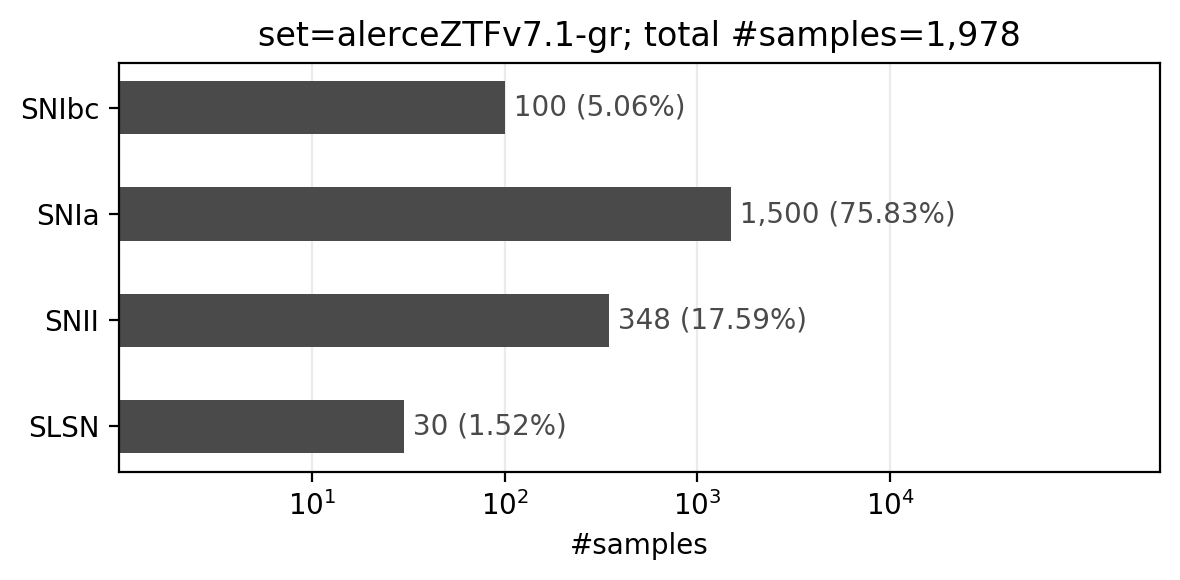

In [5]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import fuzzytools.matplotlib.plots as cplots
import fuzzytools.matplotlib.colors as cc
from fuzzytools.matplotlib.utils import save_fig

SNIIb_obj_names = ['ZTF18abojpnr', 'ZTF19aaugupw', 'ZTF19aawethv', 'ZTF18acbzoyh', 'ZTF18acqxyiq', 'ZTF18acrcyqw', 'ZTF19aadpqnb', 'ZTF19aaknate', 'ZTF19aalzvnu', 'ZTF19abqykei', 'ZTF19abqmsnk', 'ZTF19acyjjni', 'ZTF19aczmnqy', 'ZTF19aaejtof', 'ZTF20aawefgx', 'ZTF20aaxhzhc']
populations_cdict = lcdataset.split('raw',
    shuffle=True,
    random_state=0,
    outlier_obj_names=SNIIb_obj_names,
    )
#print(populations_cdict)

lcset = lcdataset['raw']
lcobj_classes = []
for c in lcset.class_names:
    lcobj_classes += [c.replace('*', '')]*len(populations_cdict[c])

title = ''
title += f'set={lcset.survey}-{"".join(lcset.band_names)}; total #samples={len(lcobj_classes):,}'+'\n'
cmap = cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']])
plt_kwargs = {
    #'ylabel':'' if ks>0 else None,
    'title':title[:-1],
    #'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
    'uses_log_scale':True,
    'figsize':[6,3],
    'cmap':cmap,
    'xlabel':'#samples',
    }
fig, ax = cplots.plot_hist_labels({'raw':lcobj_classes}, [c.replace('*', '') for c in lcset.class_names], **plt_kwargs)
fig.tight_layout()
save_fig(fig, f'../temp/classes.pdf', closes_fig=0)
plt.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


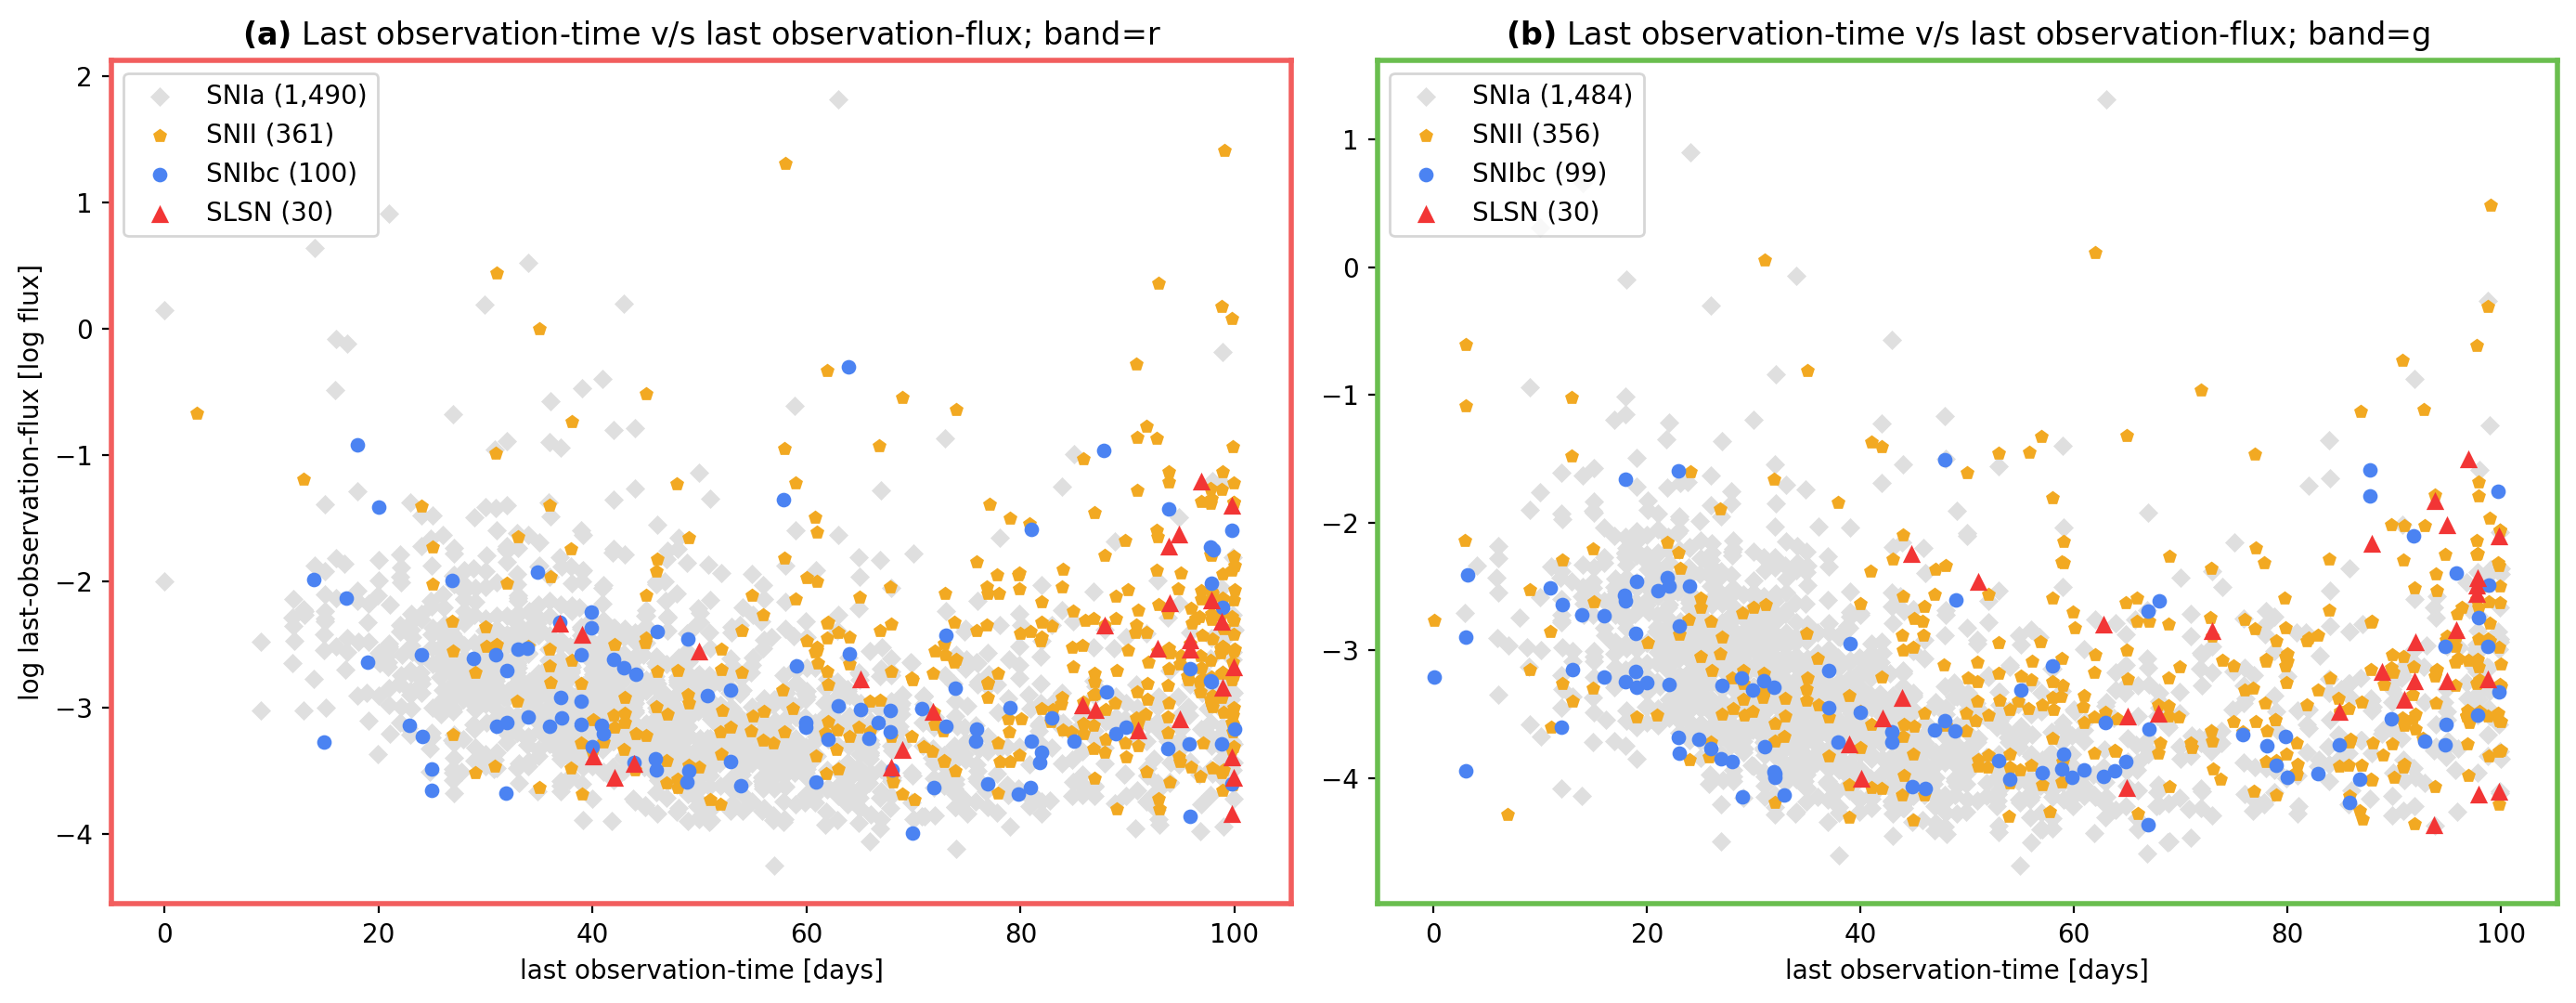

In [52]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from fuzzytools.matplotlib.scatters import scatter
from fuzzytools.matplotlib.colors import get_scaled_color
import fuzzytools.matplotlib.ax_styles as ax_styles
import numpy as np
from lchandler._C import CLASSES_STYLES, COLOR_DICT
from fuzzytools.strings import latex_bf_alphabet_count
from fuzzytools.matplotlib.utils import save_fig

set_name = f'raw'
lcobj_names = lcdataset[set_name].get_lcobj_names()
thday = 100
figsize = (14, 5.5)
dpi = 200
fig, axs = plt.subplots(1, 2, figsize=figsize, dpi=dpi)
band_names = ['r', 'g']
class_names = lcdataset[set_name].class_names
for kb,b in enumerate(band_names):
    ax = axs[kb]
    x = []
    y = []
    for lcobj_name in lcobj_names:
        lcobj = lcdataset[set_name][lcobj_name]
        lcobjb = lcobj.get_b(b)
        lcobjb.clip_attrs_given_max_day(thday) # clip by max day
        if len(lcobjb)>0:
            x += [[lcobjb.days[-1], np.log(lcobjb.obs[-1])]]
            y += [lcobj.y]
            
    scatter_kwargs = {}
    for kc,c in enumerate(class_names):
        scatter_kwargs[c] = {
            's':32*CLASSES_STYLES[c]['markerprop'],
            'color':get_scaled_color(CLASSES_STYLES[c]['c'], 2.5) if c=='SNIa' else CLASSES_STYLES[c]['c'],
            'marker':CLASSES_STYLES[c]['marker'],
            'edgecolor':'w',
            'linewidths':0,
            'alpha':1,
            'label':c.replace('*', ''),
            }
    x = np.array(x)
    y = np.array(y)
    scatter(ax, x, y, class_names, scatter_kwargs, label_format='{label} ({count})')
    ax_styles.set_color_borders(ax, COLOR_DICT[b])
    title = ''
    title = f'{latex_bf_alphabet_count(kb)} Last observation-time v/s last observation-flux; band={b}'+'\n'
    ax.set_title(title[:-1])
    ax.legend(loc='upper left')
    ax.set_xlabel('last observation-time [days]')
    if kb==0:
        ax.set_ylabel('log last-observation-flux [log flux]')
    
fig.tight_layout()
save_fig(fig, f'../temp/img.pdf', closes_fig=0)
plt.show()

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.distrs import plot_sigma_distribution

plot_sigma_distribution(lcdataset, f'0@raw_train')

In [ ]:
%load_ext autoreload
%autoreload 2

for kf in lcdataset.kfolds:
    for ks,set_name in enumerate([f'{kf}@raw_train', f'{kf}@raw_val', f'{kf}@raw_test']):
        lcdataset.sigma_clipping(set_name, set_name.replace('raw_',''),
            sigma_n=1,
            sigma_m=5, # 1, 3, 5
            apply_lower_bound=False,
            verbose=1,
            )

print(lcdataset)

In [ ]:
lcdataset['1@test'].get_lcobj_names()

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.distrs import plot_sigma_distribution

plot_sigma_distribution(lcdataset, '0@train')

In [ ]:
%load_ext autoreload
%autoreload 2
from lchandler.plots.distrs import plot_class_distribution

plot_class_distribution(lcdataset, ['0@train', '0@val', '0@test'])

In [ ]:
from fuzzytools.files import load_pickle, save_pickle
from lchandler import _C

new_cfilename = f'{cfilename}'
save_filedir = f'{root_folder}/{new_cfilename}.{_C.EXT_SPLIT_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)

In [ ]:
%load_ext autoreload
%autoreload 2
import numpy as np
from fuzzytools.progress_bars import ProgressBar
from fuzzytools.files import load_pickle, save_pickle
from fuzzytools.files import get_dict_from_filedir

filedir = f'../../surveys-save/wiib/survey=alerceZTFv7.1~bands=gr~mode=onlySNe.splcds'
filedict = get_dict_from_filedir(filedir)
root_folder = filedict['_rootdir']
cfilename = filedict['_cfilename']
survey = filedict['survey']
lcdataset2 = load_pickle(filedir)
print(lcdataset2)

In [ ]:
['ZTF18abojpnr', 'ZTF19aaugupw', 'ZTF19aawethv', 'ZTF18acbzoyh', 'ZTF18acqxyiq', 'ZTF18acrcyqw', 'ZTF19aadpqnb', 'ZTF19aaknate', 'ZTF19aalzvnu', 'ZTF19abqykei', 'ZTF19abqmsnk', 'ZTF19acyjjni', 'ZTF19aczmnqy', 'ZTF19aaejtof', 'ZTF20aawefgx', 'ZTF20aaxhzhc']

In [ ]:
lcdataset['1@test'].get_lcobj_names()

In [ ]:
lcdataset2['1@test'].get_lcobj_names()

In [ ]:
kf = 0
l1 = lcdataset[f'{kf}@test'].get_lcobj_names()
l2 = lcdataset2[f'{kf}@test'].get_lcobj_names()
intersection = list(set(l1).intersection(set(l2)))
print(len(l1))
print(len(l2))
print(len(intersection))